Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Load the Dataset

In [ ]:
data = "/content/adult.csv"
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']
df = pd.read_csv(data, names=columns, na_values=' ?', skipinitialspace=True)

Data Preprocessing, Splitting the data for model training, Training the Model and Evaluating the Model


Accuracy: 0.8472
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      4947
           1       0.74      0.57      0.64      1566

    accuracy                           0.85      6513
   macro avg       0.80      0.75      0.77      6513
weighted avg       0.84      0.85      0.84      6513

Confusion Matrix:


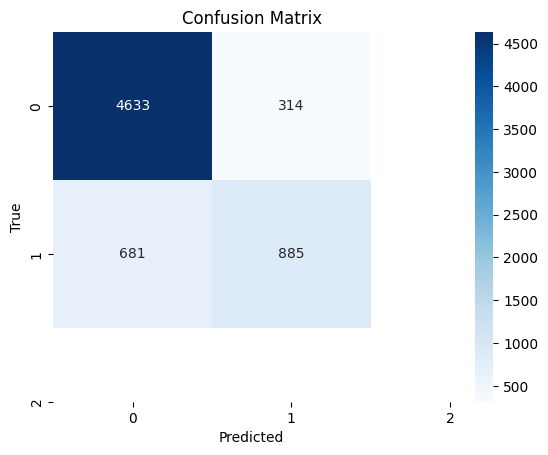

In [ ]:
# Data Preprocessing
# Handle missing values
df.fillna('Unknown', inplace=True)

# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: col.str.strip())

# Label encoding for the target variable
le = LabelEncoder()
df['income'] = le.fit_transform(df['income'])

# Split the dataset into features and target variable
X = df.drop('income', axis=1)
y = df['income']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numeric and categorical data
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create the preprocessing pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Create the preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing for numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create a pipeline that combines preprocessing with a Random Forest model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Final Output

In [ ]:
predicted_earning_less_50K = sum(y_pred == 0)  # y_pred == 0 means <=50K
predicted_earning_more_50K = sum(y_pred == 1)  # y_pred == 1 means >50K

print(f"\nNumber of individuals predicted to earn less than or equal to $50K: {predicted_earning_less_50K}")
print(f"Number of individuals predicted to earn more than $50K: {predicted_earning_more_50K}")



Number of individuals predicted to earn less than or equal to $50K: 5314
Number of individuals predicted to earn more than $50K: 1199
